In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
cc = pd.read_csv("/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv")
cc.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


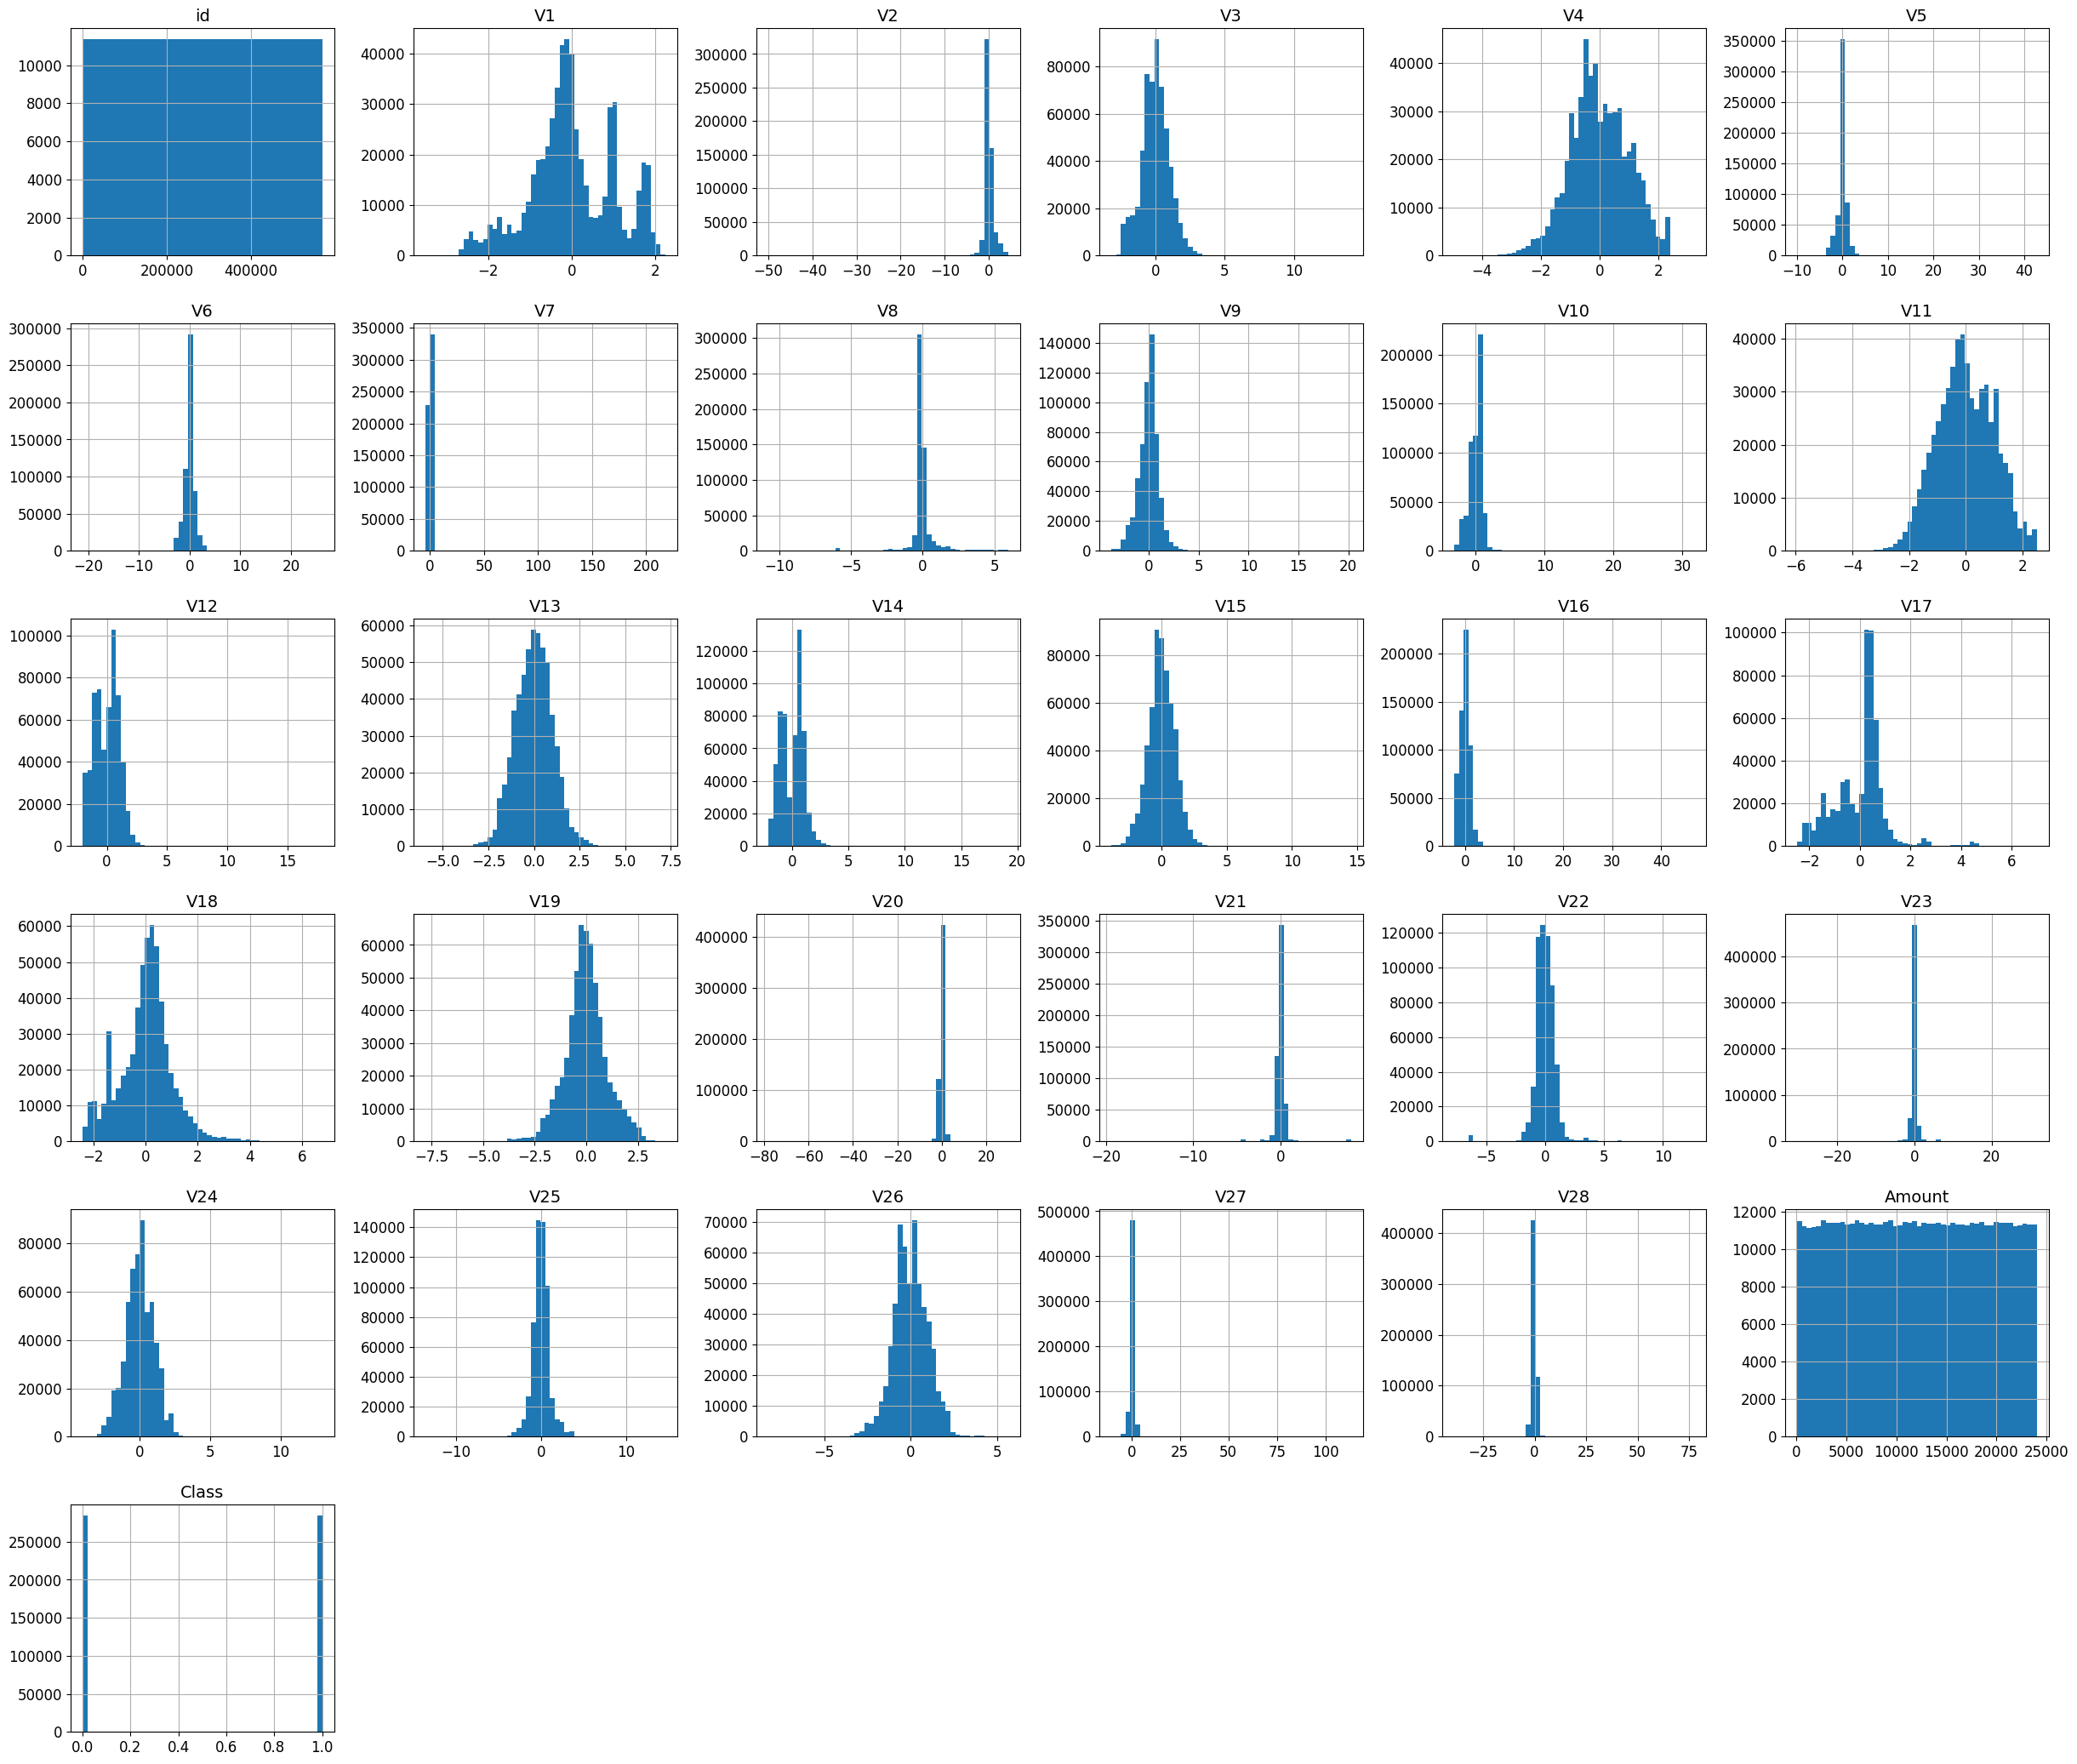

In [4]:
#default labels
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
cc.hist(bins=50, figsize=(30, 26))
plt.grid(False)

In [5]:
strat_train_set, strat_test_set = train_test_split(
    cc, test_size=0.2, stratify=cc["Class"], random_state=42)

# check dimensions, NAs, duplicates, and stratified sample
print("train_set:",strat_train_set.shape)
print("train_set duplicates:", strat_train_set.duplicated().sum())
print("train_set missing values:", strat_train_set.isna().sum().sum())
print("train_set 'Class' count:", strat_train_set['Class'].value_counts().to_dict())
print("//////////////") # test set duplicate
print("test_set missing values:", strat_test_set.isna().sum().sum())
print("test_set:",strat_test_set.shape)
print("test_set duplicates:", strat_test_set.duplicated().sum())
print("test_set 'Class' count:", strat_test_set['Class'].value_counts().to_dict())

train_set: (454904, 31)
train_set duplicates: 0
train_set missing values: 0
train_set 'Class' count: {0: 227452, 1: 227452}
//////////////
test_set missing values: 0
test_set: (113726, 31)
test_set duplicates: 0
test_set 'Class' count: {1: 56863, 0: 56863}


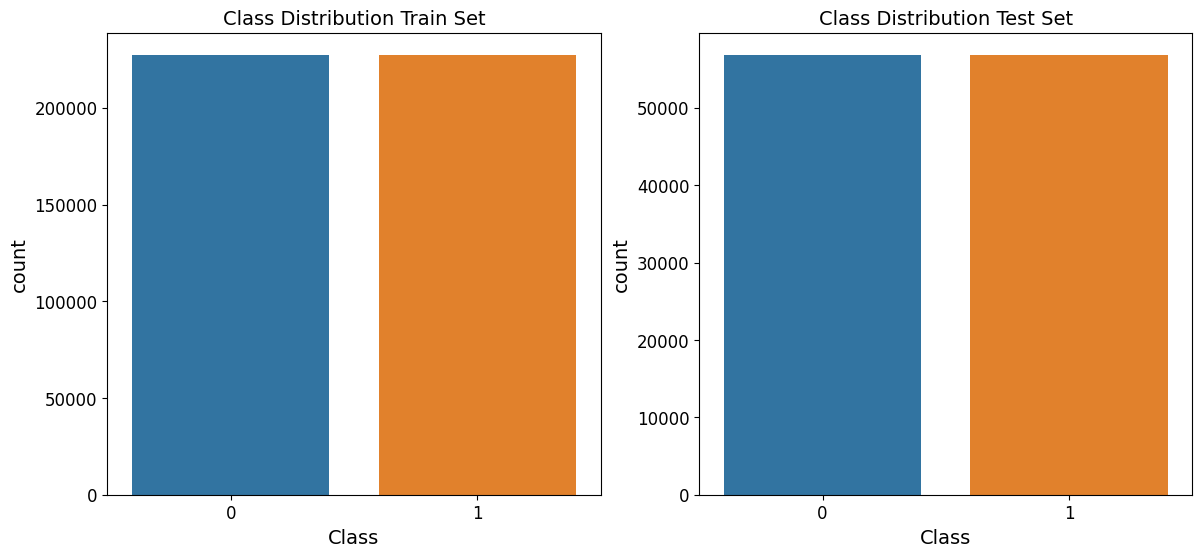

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Training Set
sns.countplot(x='Class', data=strat_train_set, ax=axes[0])
axes[0].set_title('Class Distribution Train Set')

# Plot Test Set
sns.countplot(x='Class', data=strat_test_set, ax=axes[1])
axes[1].set_title('Class Distribution Test Set')

plt.show()

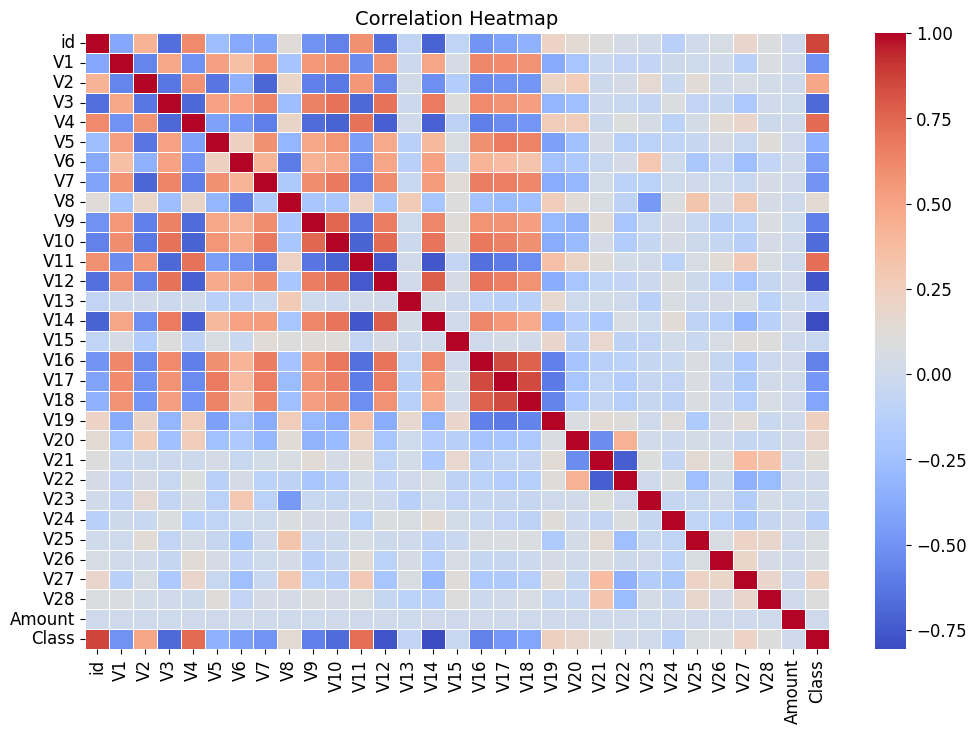

In [7]:
correlation_matrix = cc.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Cross-validation scores: [0.96328904 0.9656192  0.96558622 0.96521252 0.96531106]
Average cross-validation score: 0.9650036058321131
Standard deviation: 0.0008713556033772196
Intercept as Probability: 0.9998962420261064


Text(0.5, 1.0, 'Feature Coefficients')

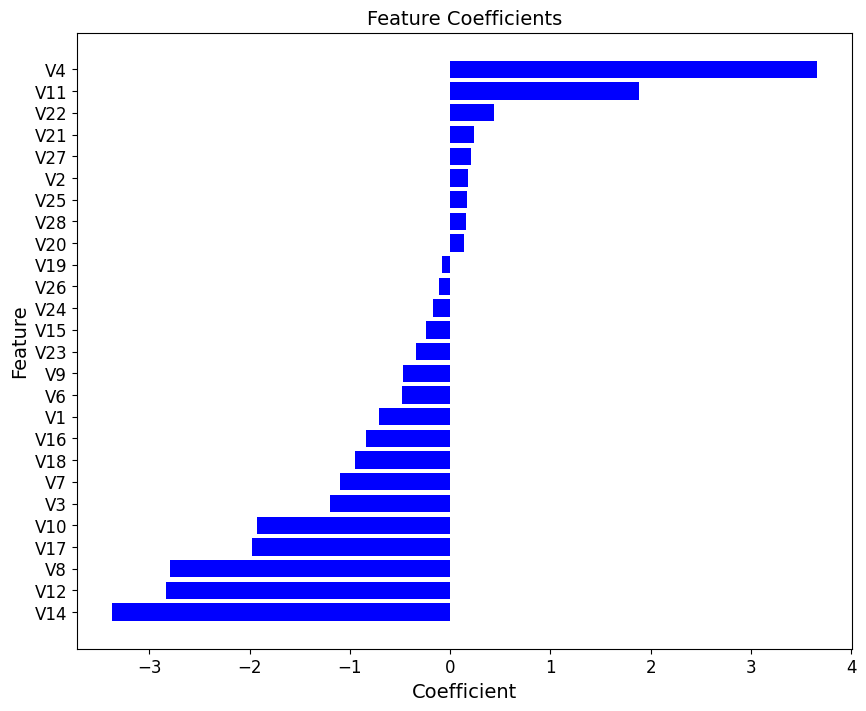

In [8]:
# Logistic Regression 

X_train = strat_train_set.drop(["Class", "id", "Amount","V5", "V13"], axis=1)
y_train = strat_train_set["Class"].copy()

logreg = LogisticRegression().fit(X_train, y_train)
scores = cross_val_score(logreg, X_train, y_train, cv=5)

coefficients = logreg.coef_.flatten()
features = X_train.columns
intercept = logreg.intercept_

coefs = pd.DataFrame({'Feature': features, 
                   'Coefficient': coefficients})

print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))
print("Standard deviation:", np.std(scores))

print(f'Intercept as Probability: {1 / (1 + math.exp(-intercept))}')

plt.figure(figsize=(10, 8))
coefs = coefs.sort_values('Coefficient')
plt.barh(coefs['Feature'], coefs['Coefficient'], color='blue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')

In [9]:
# Assuming that strat_test_set is your test set
X_test = strat_test_set.drop(["Class", "id", "Amount", "V5", "V13"], axis=1)
y_test = strat_test_set["Class"].copy()

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# You could also get a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.965029984348346
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

Confusion Matrix:
[[55592  1271]
 [ 2706 54157]]


In [10]:
# Assuming strat_train_set, strat_test_set are defined
X_train = strat_train_set.drop(["Class", "id", "Amount", "V5", "V13"], axis=1)
y_train = strat_train_set["Class"].copy()

# Define and fit Gradient Boosting model
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb_clf.fit(X_train, y_train)

# Evaluate with cross-validation
scores = cross_val_score(gb_clf, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))
print("Standard deviation:", np.std(scores))

# Feature importance
feature_importance = gb_clf.feature_importances_
features = X_train.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_df = feature_df.sort_values('Importance', ascending=False)
print(feature_df)


Cross-validation scores: [0.97833614 0.9791385  0.97979798 0.97879777 0.97888547]
Average cross-validation score: 0.9789911715313512
Standard deviation: 0.00047964441243611737
   Feature  Importance
11     V14    0.880533
3       V4    0.081744
10     V12    0.008131
2       V3    0.004575
0       V1    0.003750
8      V10    0.003140
14     V17    0.002787
9      V11    0.002603
6       V8    0.001912
7       V9    0.001375
16     V19    0.001251
15     V18    0.001221
13     V16    0.001210
5       V7    0.001132
17     V20    0.001048
4       V6    0.000984
20     V23    0.000694
22     V25    0.000402
23     V26    0.000343
25     V28    0.000236
1       V2    0.000231
12     V15    0.000217
19     V22    0.000181
21     V24    0.000172
24     V27    0.000092
18     V21    0.000036


In [11]:
# Test data
X_test = strat_test_set.drop(["Class", "id", "Amount", "V5", "V13"], axis=1)
y_test = strat_test_set["Class"].copy()

# Make predictions and evaluate on the test set
y_pred = gb_clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.9801628475458558
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     56863
           1       0.98      0.98      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726

Confusion Matrix:
[[55979   884]
 [ 1372 55491]]
